<a href="https://colab.research.google.com/github/Zahra-Nafariyeh/Text_Classificaition/blob/main/Bert_text_classificaition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My\ Drive/Bahrami

/content/gdrive/My Drive/Bahrami


In [ ]:
!ls

 0.ipynb        arxiv-metadata-oai-snapshot.json       runs
'1 (1).ipynb'   arxiv-metadata-oai-snapshot.json.zip   test.csv
 1-Complain     cache_dir			       test_z.csv
 1.ipynb       'Copy of Copy of 1.ipynb'	       test_zj.json
 2-Test         outputs				       Untitled0.ipynb


In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.4MB/s 
     |████████████████████████████████| 2.9MB 16.9MB/s 
     |████████████████████████████████| 890kB 56.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=7a3f48a41bea8721da363b85b51a788888d2f1155d4cb63a529a426306fc8c00
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import numpy as np
import pandas as pd
import os, json, gc, re, random
from tqdm.notebook import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
# !pip uninstall -q torch -y > /dev/null
# !pip install -q torch==1.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null
# !pip install -q -U transformers > /dev/null
# !pip install -q -U simpletransformers > /dev/null

In [ ]:
# import torch, transformers, tokenizers
# torch.__version__, transformers.__version__, tokenizers.__version__

('1.7.0+cu101', '4.0.0', '0.9.4')

In [ ]:
data_file = 'arxiv-metadata-oai-snapshot.json'

""" Using `yield` to load the JSON file in a loop to prevent Python memory issues if JSON is loaded directly"""

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            # print("*****************")
            # print(line)
            # print("*****************")

            yield line

####Json File

In [ ]:
metadata = get_metadata()
counter = 0 

for paper in metadata:
    print(paper)
    # counter = counter +1
    # if (counter == 5) :
    #     break
    break 

{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predic

In [ ]:
metadata = get_metadata()
counter = 0 
with open('test_z2.csv', 'w') as f :
    for paper in metadata:
        for k, v in json.loads(paper).items():
            print(f'{k}: {v} \n')
            # f.write("%s,%s\n"%(k,v))
            if counter ==0 :
                f.write("%s"%(k)) 
                f.write(",")                   
            if counter >0  :
                f.write("%s"%(v))
                f.write(",")
        f.write("\n")
        counter = counter +1
        if (counter == 5) :
            break

id: 0704.0001 

submitter: Pavel Nadolsky 

authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan 

title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies 

comments: 37 pages, 15 figures; published version 

journal-ref: Phys.Rev.D76:013009,2007 

doi: 10.1103/PhysRevD.76.013009 

report-no: ANL-HEP-PR-07-12 

categories: hep-ph 

license: None 

abstract:   A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agreement is
demonstrated with data from the Fermilab Tevatron, and predictions are made for
m

####Short Json

In [ ]:
metadata = get_metadata()
counter = 0 

with open('test_zj.json', 'w') as outfile :
    for paper in metadata:
        # json_object = json.dumps(paper, indent = 4) 
        print(paper)
        outfile.write(paper) 
        counter = counter +1
        if (counter == 10000) :
            break

        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"id":"0705.4628","submitter":"Hyeong-Chan Kim","authors":"Hyeong-Chan Kim, Chaiho Rim, and Jae Hyung Yee","title":"Blackbody radiation in \\kappa-Minkowski spacetime","comments":"22pages, No figure, some corrections, to appear in Phys. Rev. D","journal-ref":"Phys.Rev.D76:105012,2007","doi":"10.1103/PhysRevD.76.105012","report-no":null,"categories":"hep-th","license":null,"abstract":"  We have computed the black body radiation spectra in $\\kappa-$Minkowski\nspace-time, using the quantum mechanical picture of massless scalar particles\nas well as effective quantum field theory picture. The black body radiation\ndepends on how the field theory (and thus how the $\\kappa-$Poincar\\'e algebra)\nhandles the ordering effect of the noncommutative space-time. In addition,\nthere exists a natural momentum cut-off of the order $\\kappa$, beyond which a\nnew real mode takes its shape from a complex mode and the old real mode flows\nout to be a new complex mode. However, the new high momentum rea

####Show Short Json File

In [ ]:
data_file = 'test_zj.json'


def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:

            yield line


metadata = get_metadata()
counter = 0 

for paper in metadata:
    print(paper)
    # counter = counter +1
    # if (counter == 5) :
    #     break
      

{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predic

####categories Column

In [ ]:
category_map = {'astro-ph': 'Astrophysics',
                'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
                'astro-ph.EP': 'Earth and Planetary Astrophysics',
                'astro-ph.GA': 'Astrophysics of Galaxies',
                'astro-ph.HE': 'High Energy Astrophysical Phenomena',
                'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
                'astro-ph.SR': 'Solar and Stellar Astrophysics',
                'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
                'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
                'cond-mat.mtrl-sci': 'Materials Science',
                'cond-mat.other': 'Other Condensed Matter',
                'cond-mat.quant-gas': 'Quantum Gases',
                'cond-mat.soft': 'Soft Condensed Matter',
                'cond-mat.stat-mech': 'Statistical Mechanics',
                'cond-mat.str-el': 'Strongly Correlated Electrons',
                'cond-mat.supr-con': 'Superconductivity',
                'cs.AI': 'Artificial Intelligence',
                'cs.AR': 'Hardware Architecture',
                'cs.CC': 'Computational Complexity',
                'cs.CE': 'Computational Engineering, Finance, and Science',
                'cs.CG': 'Computational Geometry',
                'cs.CL': 'Computation and Language',
                'cs.CR': 'Cryptography and Security',
                'cs.CV': 'Computer Vision and Pattern Recognition',
                'cs.CY': 'Computers and Society',
                'cs.DB': 'Databases',
                'cs.DC': 'Distributed, Parallel, and Cluster Computing',
                'cs.DL': 'Digital Libraries',
                'cs.DM': 'Discrete Mathematics',
                'cs.DS': 'Data Structures and Algorithms',
                'cs.ET': 'Emerging Technologies',
                'cs.FL': 'Formal Languages and Automata Theory',
                'cs.GL': 'General Literature',
                'cs.GR': 'Graphics',
                'cs.GT': 'Computer Science and Game Theory',
                'cs.HC': 'Human-Computer Interaction',
                'cs.IR': 'Information Retrieval',
                'cs.IT': 'Information Theory',
                'cs.LG': 'Machine Learning',
                'cs.LO': 'Logic in Computer Science',
                'cs.MA': 'Multiagent Systems',
                'cs.MM': 'Multimedia',
                'cs.MS': 'Mathematical Software',
                'cs.NA': 'Numerical Analysis',
                'cs.NE': 'Neural and Evolutionary Computing',
                'cs.NI': 'Networking and Internet Architecture',
                'cs.OH': 'Other Computer Science',
                'cs.OS': 'Operating Systems',
                'cs.PF': 'Performance',
                'cs.PL': 'Programming Languages',
                'cs.RO': 'Robotics',
                'cs.SC': 'Symbolic Computation',
                'cs.SD': 'Sound',
                'cs.SE': 'Software Engineering',
                'cs.SI': 'Social and Information Networks',
                'cs.SY': 'Systems and Control',
                # 'econ.EM': 'Econometrics',
                # 'eess.AS': 'Audio and Speech Processing',
                # 'eess.IV': 'Image and Video Processing',
                # 'eess.SP': 'Signal Processing',
                'gr-qc': 'General Relativity and Quantum Cosmology',
                'hep-ex': 'High Energy Physics - Experiment',
                'hep-lat': 'High Energy Physics - Lattice',
                'hep-ph': 'High Energy Physics - Phenomenology',
                'hep-th': 'High Energy Physics - Theory',
                'math.AC': 'Commutative Algebra',
                'math.AG': 'Algebraic Geometry',
                'math.AP': 'Analysis of PDEs',
                'math.AT': 'Algebraic Topology',
                'math.CA': 'Classical Analysis and ODEs',
                'math.CO': 'Combinatorics',
                'math.CT': 'Category Theory',
                'math.CV': 'Complex Variables',
                'math.DG': 'Differential Geometry',
                'math.DS': 'Dynamical Systems',
                'math.FA': 'Functional Analysis',
                'math.GM': 'General Mathematics',
                'math.GN': 'General Topology',
                'math.GR': 'Group Theory',
                'math.GT': 'Geometric Topology',
                'math.HO': 'History and Overview',
                'math.IT': 'Information Theory',
                'math.KT': 'K-Theory and Homology',
                'math.LO': 'Logic',
                'math.MG': 'Metric Geometry',
                'math.MP': 'Mathematical Physics',
                'math.NA': 'Numerical Analysis',
                'math.NT': 'Number Theory',
                'math.OA': 'Operator Algebras',
                'math.OC': 'Optimization and Control',
                'math.PR': 'Probability',
                'math.QA': 'Quantum Algebra',
                'math.RA': 'Rings and Algebras',
                'math.RT': 'Representation Theory',
                'math.SG': 'Symplectic Geometry',
                'math.SP': 'Spectral Theory',
                'math.ST': 'Statistics Theory',
                'math-ph': 'Mathematical Physics',
                'nlin.AO': 'Adaptation and Self-Organizing Systems',
                'nlin.CD': 'Chaotic Dynamics',
                'nlin.CG': 'Cellular Automata and Lattice Gases',
                'nlin.PS': 'Pattern Formation and Solitons',
                'nlin.SI': 'Exactly Solvable and Integrable Systems',
                'nucl-ex': 'Nuclear Experiment',
                'nucl-th': 'Nuclear Theory',
                'physics.acc-ph': 'Accelerator Physics',
                'physics.ao-ph': 'Atmospheric and Oceanic Physics',
                'physics.app-ph': 'Applied Physics',
                'physics.atm-clus': 'Atomic and Molecular Clusters',
                'physics.atom-ph': 'Atomic Physics',
                'physics.bio-ph': 'Biological Physics',
                'physics.chem-ph': 'Chemical Physics',
                'physics.class-ph': 'Classical Physics',
                'physics.comp-ph': 'Computational Physics',
                'physics.data-an': 'Data Analysis, Statistics and Probability',
                'physics.ed-ph': 'Physics Education',
                'physics.flu-dyn': 'Fluid Dynamics',
                'physics.gen-ph': 'General Physics',
                'physics.geo-ph': 'Geophysics',
                'physics.hist-ph': 'History and Philosophy of Physics',
                'physics.ins-det': 'Instrumentation and Detectors',
                'physics.med-ph': 'Medical Physics',
                'physics.optics': 'Optics',
                'physics.plasm-ph': 'Plasma Physics',
                'physics.pop-ph': 'Popular Physics',
                'physics.soc-ph': 'Physics and Society',
                'physics.space-ph': 'Space Physics',
                'q-bio.BM': 'Biomolecules',
                'q-bio.CB': 'Cell Behavior',
                'q-bio.GN': 'Genomics',
                'q-bio.MN': 'Molecular Networks',
                'q-bio.NC': 'Neurons and Cognition',
                'q-bio.OT': 'Other Quantitative Biology',
                'q-bio.PE': 'Populations and Evolution',
                'q-bio.QM': 'Quantitative Methods',
                'q-bio.SC': 'Subcellular Processes',
                'q-bio.TO': 'Tissues and Organs',
                'q-fin.CP': 'Computational Finance',
                'q-fin.EC': 'Economics',
                'q-fin.GN': 'General Finance',
                'q-fin.MF': 'Mathematical Finance',
                'q-fin.PM': 'Portfolio Management',
                'q-fin.PR': 'Pricing of Securities',
                'q-fin.RM': 'Risk Management',
                'q-fin.ST': 'Statistical Finance',
                'q-fin.TR': 'Trading and Market Microstructure',
                'quant-ph': 'Quantum Physics',
                'stat.AP': 'Applications',
                'stat.CO': 'Computation',
                'stat.ME': 'Methodology',
                'stat.ML': 'Machine Learning',
                'stat.OT': 'Other Statistics',
                'stat.TH': 'Statistics Theory'}

####Show datafreme

In [ ]:
import pandas as pd
df = pd.read_json('test_zj.json' , lines=True)
df.head(2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"


In [ ]:
len(list(df['categories'].unique()))   #1456
len(list(df['categories']))   #10000


10000

####Lable DataFrame

In [ ]:
for i in range((df.shape[0])):
    print(type(str(df.categories)))
    # print((str(df.categories)))
    if (str(df.categories[i]) == 'hep-ph') :
        print((str(df.categories[i])))
    # df.loc[(df.categories == re.search(r'hep-.*', str(df.categories[i])) ), 'label'] = '1'
    # if (re.search(r'hep-.*', str(df.categories[i]))):
    # if (re.search(r'hep-.*', str(df.loc[df.categories]))):
        print("zzzzzzz")
    break

# df.head()

<class 'str'>
hep-ph
zzzzzzz


In [ ]:
df = df.drop(columns=['id', 'authors', 'title', 'comments' , 'journal-ref' , 'doi' , 'report-no' , 'license' , 'versions', 'update_date' , 'authors_parsed' , 'submitter'])
# df = df.rename(columns={'Text':'text','Suggestion': 'label'})

for i in range((df.shape[0])):
    # print(type(str(df.categories)))
    # # print((str(df.categories)))
    # if (str(df.categories[i]) == 'hep-ph') :
    #     print((str(df.categories[i])))
    # df.loc[(df.categories == re.search(r'hep-.*', str(df.categories[i])) ), 'label'] = '1'



    if (re.search(r'astro-.*', str(df.categories[i]))):
        # print(str(df.categories[i]))
        df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 0

    if (re.search(r'cond-.*', str(df.categories[i]))):
        df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 1

    # if (re.search(r'cs.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 2    

    # # if (re.search(r'econ.*', str(df.categories[i]))):
    # #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = '3' 

    # # if (re.search(r'eess.*', str(df.categories[i]))):
    # #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = '4' 

    # if (re.search(r'gr-qc', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 3 

    # if (re.search(r'hep.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 4 

    # if (re.search(r'math.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 5 

    # if (re.search(r'nlin.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 6 

    # if (re.search(r'nucl.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 7 

    # if (re.search(r'physics.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 8 

    # if (re.search(r'q-.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 9 

    # if (re.search(r'quant-ph', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 10 

    # if (re.search(r'stat.*', str(df.categories[i]))):
    #     df.loc[(df.categories == str(df.categories[i])), 'label_t'] = 11 


    # break

df = df.drop(columns=['categories'])
df.dropna(subset = ["label_t"], inplace=True)
df.head()


,abstract,label_t
5,We study the two-particle wave function of p...,1.0
7,A general formulation was developed to repre...,1.0
8,We discuss the results from the combined IRA...,0.0
16,Results from spectroscopic observations of t...,0.0
22,"The very nature of the solar chromosphere, i...",0.0


class 0 :  2056
class 1 :  1926


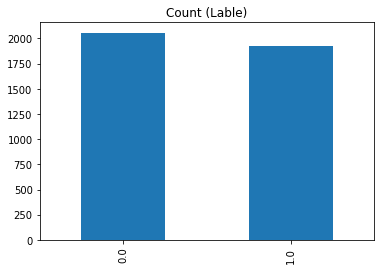

In [ ]:
print("class 0 : ",len(df.loc[df.label_t == 0 ])) 
print("class 1 : ",len(df.loc[df.label_t == 1 ])) 
# print("class 2 : ",len(df.loc[df.label_t == 2 ])) 
# print("class 3 : ",len(df.loc[df.label_t == 3 ])) 

# print("class 4 : ",len(df.loc[df.label_t == 4 ])) 
# print("class 5 : ",len(df.loc[df.label_t == 5 ])) 
# print("class 6 : ",len(df.loc[df.label_t == 6 ])) 
# print("class 7 : ",len(df.loc[df.label_t == 7 ])) 

# print("class 8 : ",len(df.loc[df.label_t == 8 ])) 
# print("class 9 : ",len(df.loc[df.label_t == 9 ])) 
# print("class 10 : ",len(df.loc[df.label_t == 10 ])) 
# print("class 11 : ",len(df.loc[df.label_t == 11 ])) 


target_count = df.label_t.value_counts()
target_count.plot(kind='bar', title='Count (Lable)');

In [ ]:
# data = data.target.resample(0)
# print("class 0 : ",data[data.target == 0].shape) 
from sklearn.utils import resample


# Upsample minority class #2770
class_0 = resample( df[df.label_t== 0 ], 
                                replace=True,     # sample with replacement
                                n_samples=2256,    # to match majority class
                                random_state=123) # reproducible results


class_1 = resample( df[df.label_t== 1 ], 
                                replace=True,     # sample with replacement
                                n_samples=2256,    # to match majority class
                                random_state=123) # reproducible results

# class_2 = resample( df[df.label_t== 2 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results 


# class_3 = resample( df[df.label_t== 3 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results



# class_4 = resample( df[df.label_t== 4 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results 


# class_5 = resample( df[df.label_t== 5 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results  


# class_6 = resample( df[df.label_t== 6 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results    


# class_7 = resample( df[df.label_t== 7 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results   


# class_8 = resample( df[df.label_t== 8 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results     


# class_9 = resample( df[df.label_t== 9 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results  


# class_10 = resample( df[df.label_t== 10 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results 


# class_11 = resample( df[df.label_t== 11 ], 
#                                 replace=True,     # sample with replacement
#                                 n_samples=2256,    # to match majority class
#                                 random_state=123) # reproducible results                                                                                                                                                                                                                                                                                                           

In [ ]:
print(class_0.shape,class_1.shape)#, class_2.shape ,class_3.shape )
# print(class_4.shape,class_5.shape, class_6.shape ,class_7.shape )
# print(class_8.shape,class_9.shape, class_10.shape ,class_11.shape )

(2256, 2) (2256, 2)


In [ ]:
dataset = pd.concat([class_0,class_1 ])#, class_2 ,class_3,
                    #  class_4,class_5, class_6 ,class_7,
                    #  class_8,class_9, class_10 ,class_11])
dataset

,abstract,label_t
6444,We follow the changes in the structure of th...,0.0
5314,We study the relative motion of nearby free ...,0.0
8603,Disks in the 6 Myr old cluster eta Chamaeleo...,0.0
5446,We present the results of a new spectroscopi...,0.0
7650,"Strongly warped regions, also known as throa...",0.0
...,...,...
1439,"The AlPdMn quasicrystal approximants xi, xi'...",1.0
6753,We study the dynamic critical behavior of th...,1.0
4179,Four modifications of the corona triode are ...,1.0
606,We show that plasmons in two-dimensional gra...,1.0


####Clean Dataset

####Shufle Dataset

In [ ]:
#shuffle the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
# res_df.polarity = res_df.polarity.astype('str')
dataset

,abstract,label_t
0,It has been recently argued through numerica...,0.0
1,We study numerically the nonequilibrium dyna...,1.0
2,"In a series of recent papers, a new formalis...",0.0
3,Using a widely used stellar population synth...,0.0
4,We explore the dependence of pre-supernova e...,0.0
...,...,...
4507,We compute the magnetic susceptibility and s...,1.0
4508,We have explored a sample of suspected A-typ...,0.0
4509,We use large-scale three-dimensional simulat...,0.0
4510,We consider black holes in Lorentz violating...,0.0


In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2)

####Tokenization

In [ ]:
def convert_data_into_input_example(data):
    input_examples = []
    for i in range(len(data)):
        example = InputExample(
            guid= None,
            text_a= data.iloc[i]['abstract'],
            text_b= None,
            label= data.iloc[i]['label_t']
        )
        input_examples.append(example)
    return input_examples

In [ ]:
import csv
import pandas as pd
import numpy as np
import os
import re
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BasicTokenizer
from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features, InputExample

In [ ]:
####Approche_1 

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

text = 'I liked that book very much!'
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)
text_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
print('text ids:', text_ids)
text_ids_with_special_tokens = tokenizer.build_inputs_with_special_tokens(text_ids)
print('text ids with special tokens: ', text_ids_with_special_tokens)

# ['I', 'like', '##d', 'that', 'book', 'very', 'much', '!']
# text ids: [146, 11850, 10162, 10189, 12748, 12558, 13172, 106]
# text ids with special tokens:  [101, 146, 11850, 10162, 10189, 12748, 12558, 13172, 106, 102]


INFO:filelock:Lock 139957153054616 acquired on /root/.cache/huggingface/transformers/eff018e45de5364a8368df1f2df3461d506e2a111e9dd50af1fae061cd460ead.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock


INFO:filelock:Lock 139957153054616 released on /root/.cache/huggingface/transformers/eff018e45de5364a8368df1f2df3461d506e2a111e9dd50af1fae061cd460ead.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock



['I', 'like', '##d', 'that', 'book', 'very', 'much', '!']
text ids: [146, 11850, 10162, 10189, 12748, 12558, 13172, 106]
text ids with special tokens:  [101, 146, 11850, 10162, 10189, 12748, 12558, 13172, 106, 102]


In [ ]:
####Approche_2 

MAX_SEQ_LENGTH = 128
encoded_bert_text = tokenizer.encode(text, add_special_tokens=True, max_length=MAX_SEQ_LENGTH)
# encoded_bert_text = tokenizer.encode(text, add_special_tokens=True, max_length=MAX_SEQ_LENGTH, return_tensors='tf')

print('encoded text: ', encoded_bert_text)
decoded_text_with_special_token = tokenizer.decode(encoded_bert_text)
decoded_text_without_special_token = tokenizer.decode(encoded_bert_text, skip_special_tokens=True)

print('decoded text with special token: ', decoded_text_with_special_token)
print('decoded text without special token: ', decoded_text_without_special_token)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


encoded text:  [101, 146, 11850, 10162, 10189, 12748, 12558, 13172, 106, 102]
decoded text with special token:  [CLS] I liked that book very much! [SEP]
decoded text without special token:  I liked that book very much!


In [ ]:
####Approche_3 

label_list = [0,1]#,2,3,4,5,6,7,8,9,10,11]

bert_train_dataset = glue_convert_examples_to_features(examples=train_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)
bert_val_dataset = glue_convert_examples_to_features(examples=val_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)

for i in range(3):
#     print('Example: {}'.format(bert_train_dataset[i]))
    print('Example: {')
    print(' Input_ids: {}'.format(bert_train_dataset[i].input_ids))
    print(' attention_mask: {}'.format(bert_train_dataset[i].attention_mask))
    print(' token_type_ids: {}'.format(bert_train_dataset[i].token_type_ids))
    print(' label: {}'.format(bert_train_dataset[i].label))
    print('}')

Example: {
 Input_ids: [101, 12865, 14687, 32384, 15478, 95674, 10108, 169, 39803, 38253, 88635, 10106, 10105, 25599, 10146, 11206, 10146, 10106, 10105, 28589, 10108, 55026, 13939, 119, 12865, 71695, 10105, 64999, 11949, 10108, 13547, 11424, 58768, 43805, 17942, 10822, 70788, 10107, 13382, 12902, 13192, 23078, 10107, 10111, 44915, 64592, 119, 12865, 10379, 11897, 10189, 10464, 10944, 74195, 10151, 33111, 55026, 14316, 10106, 169, 46638, 76395, 11388, 10319, 10124, 73116, 10106, 173, 76395, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

####We Test Approach3

In [ ]:
train_input_examples = convert_data_into_input_example(train_data)
val_input_examples = convert_data_into_input_example(test_data)


label_list = [0,1]#,2,3,4,5,6,7,8,9,10,11]
bert_train_dataset = glue_convert_examples_to_features(examples=train_input_examples, tokenizer=tokenizer, max_length=128, task='mrpc', label_list=label_list)
bert_val_dataset = glue_convert_examples_to_features(examples=val_input_examples, tokenizer=tokenizer, max_length=128, task='mrpc', label_list=label_list)

for i in range(10):
    print('Example: {}'.format(bert_train_dataset[i]))

Example: InputFeatures(input_ids=[101, 12865, 14687, 32384, 15478, 95674, 10108, 169, 39803, 38253, 88635, 10106, 10105, 25599, 10146, 11206, 10146, 10106, 10105, 28589, 10108, 55026, 13939, 119, 12865, 71695, 10105, 64999, 11949, 10108, 13547, 11424, 58768, 43805, 17942, 10822, 70788, 10107, 13382, 12902, 13192, 23078, 10107, 10111, 44915, 64592, 119, 12865, 10379, 11897, 10189, 10464, 10944, 74195, 10151, 33111, 55026, 14316, 10106, 169, 46638, 76395, 11388, 10319, 10124, 73116, 10106, 173, 76395, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
ex = bert_train_dataset[0]
in_ids = ex.input_ids
decoded_seq = tokenizer.decode(in_ids, skip_special_tokens=True)
print(decoded_seq)

We study Langevin dynamics of a driven charged particle in the presence as well as in the absence of magnetic field. We discuss the validity of various work fluctuation theorems using different model potentials and external drives. We also show that one can generate an orbital magnetic moment in a nonequilibrium state which is absent in equilibrium.


####Training the Model

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')

# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# loss = tf.keras.losses.BinaryCrossentropy()
# metric = tf.keras.metrics.BinaryCrossentropy('accuracy')
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

for i in range(11):
    print(bert_train_dataset[i])

INFO:filelock:Lock 139957153054392 acquired on /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c.lock


INFO:filelock:Lock 139957153054392 released on /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c.lock


INFO:filelock:Lock 139956869566872 acquired on /root/.cache/huggingface/transformers/879ba3c37de5c396bee982a9383f64cf08c9cc966d66742254a3904e6719357f.53d9b251a2a9d5d86139b64555b5e8deb0a20fc53f8a5ee958ddbb4506125a0b.h5.lock


INFO:filelock:Lock 139956869566872 released on /root/.cache/huggingface/transformers/879ba3c37de5c396bee982a9383f64cf08c9cc966d66742254a3904e6719357f.53d9b251a2a9d5d86139b64555b5e8deb0a20fc53f8a5ee958ddbb4506125a0b.h5.lock


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


InputFeatures(input_ids=[101, 12865, 14687, 32384, 15478, 95674, 10108, 169, 39803, 38253, 88635, 10106, 10105, 25599, 10146, 11206, 10146, 10106, 10105, 28589, 10108, 55026, 13939, 119, 12865, 71695, 10105, 64999, 11949, 10108, 13547, 11424, 58768, 43805, 17942, 10822, 70788, 10107, 13382, 12902, 13192, 23078, 10107, 10111, 44915, 64592, 119, 12865, 10379, 11897, 10189, 10464, 10944, 74195, 10151, 33111, 55026, 14316, 10106, 169, 46638, 76395, 11388, 10319, 10124, 73116, 10106, 173, 76395, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# model.fit(bert_train_dataset, validation_data=bert_val_dataset, epochs=3)

##Workaround

In [ ]:
def my_solution(bdset):
    
    input_ids, attention_mask, token_type_ids, label = [], [], [], []
    for in_ex in bdset:
        input_ids.append(in_ex.input_ids)
        attention_mask.append(in_ex.attention_mask)
        token_type_ids.append(in_ex.token_type_ids)
        label.append(in_ex.label)

    input_ids = np.vstack(input_ids)
    attention_mask = np.vstack(attention_mask)
    token_type_ids = np.vstack(token_type_ids)
    label = np.vstack(label)
    return ([input_ids, attention_mask, token_type_ids], label)


In [ ]:
x_train, y_train = my_solution(bert_train_dataset)
len(y_train)



np.unique(y_train)

array([0, 1])

####Training The Model

In [ ]:
x_train, y_train = my_solution(bert_train_dataset)
x_val, y_val = my_solution(bert_val_dataset)

print('x_val size: {}'.format(len(x_val)))
def example_to_features(input_ids, attention_masks, token_type_ids, y):
    return {"input_ids": input_ids,
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids},y


train_ds = tf.data.Dataset.from_tensor_slices((x_train[0], x_train[1], x_train[2], y_train)).map(example_to_features).shuffle(100).batch(32)
val_ds   = tf.data.Dataset.from_tensor_slices((x_val[0], x_val[1], x_val[2], y_val)).map(example_to_features).batch(64)

print('format of model input examples: '.format(train_ds.take(1)))

EPOCHS = 5

print(train_ds)
print(val_ds)

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)


# history = model.fit(x_train, y_train, epochs=5, validation_data=x_val, verbose=1)

x_val size: 3
format of model input examples: 
<BatchDataset shapes: ({input_ids: (None, 128), attention_mask: (None, 128), token_type_ids: (None, 128)}, (None, 1)), types: ({input_ids: tf.int64, attention_mask: tf.int64, token_type_ids: tf.int64}, tf.int64)>
<BatchDataset shapes: ({input_ids: (None, 128), attention_mask: (None, 128), token_type_ids: (None, 128)}, (None, 1)), types: ({input_ids: tf.int64, attention_mask: tf.int64, token_type_ids: tf.int64}, tf.int64)>
Epoch 1/5


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).WARNING:tensorflow:AutoGraph could not transform <bound method Socket.send of <zmq.sugar.socket.Socket object at 0x7f4af053a5f8>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f4b07d81e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f4b07d81e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


113/113 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.8133

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


113/113 [==============================] - 144s 915ms/step - loss: 0.4105 - accuracy: 0.8141 - val_loss: 0.1064 - val_accuracy: 0.9612
Epoch 2/5
113/113 [==============================] - 106s 943ms/step - loss: 0.0858 - accuracy: 0.9715 - val_loss: 0.0555 - val_accuracy: 0.9856
Epoch 3/5
113/113 [==============================] - 110s 970ms/step - loss: 0.0397 - accuracy: 0.9890 - val_loss: 0.0710 - val_accuracy: 0.9812
Epoch 4/5
113/113 [==============================] - 112s 990ms/step - loss: 0.0275 - accuracy: 0.9931 - val_loss: 0.0598 - val_accuracy: 0.9845
Epoch 5/5
113/113 [==============================] - 112s 991ms/step - loss: 0.0121 - accuracy: 0.9979 - val_loss: 0.0541 - val_accuracy: 0.9878


#Plot Loss And Accuracy

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

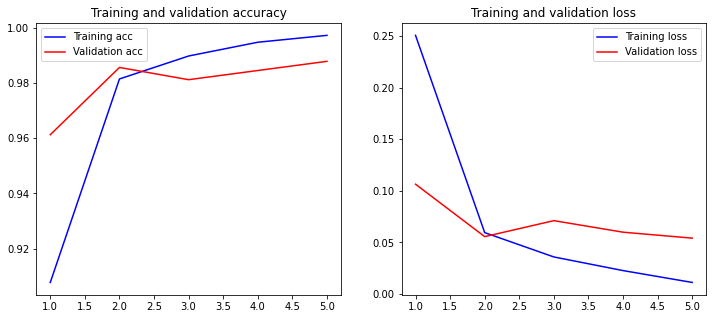

In [ ]:
plot_history(history)

In [ ]:
# print(len(list(val_ds)))
predictions = model.predict(val_ds)
print(predictions[0].shape)
print()
predictions_classes = np.argmax(predictions[0], axis = 1)
# print('pred class:', predictions_classes)
for i in range(10):
    print('comment: {}\n, actual label: {}, predicted label: {}'.format(test_data.iloc[i]['abstract'], val_input_examples[i].label, predictions_classes[i]))

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


(903, 2)

comment:   Ultraviolet (UV) galaxies have been selected from GALEX. The presence of a
FUV-dropout in their spectral energy distributions proved to be a very complete
(83.3%) but not very efficient (21.4%) tool for identifying Lyman Break
Galaxies (LBGs) at z~1. We divide the LBG sample into two sub-classes: red LBGs
(RLBGs) detected at 24 micron which are mainly Luminous IR Galaxies (LIRGs) and
blue LBGs (BLBGs) undetected at 24 microns down to 83 microJy. Two of the RLBGs
are also detected at 70 micron. The median SED of the RLBGs is similar (above
lambda~1 micron) to the dusty starburst HR10. However, unlike local (U)LIRGs,
RLBGs are UV bright objects. We suggest that these objects contain a large
amount of dust but that some bare stellar populations are also directly
visible. The median SED of the BLBGs is consistent with their containing the
same stellar population as the RLBGs but with a lower dust content. The
luminosity function of our LBG sample at z~1 is similar to t